## Introduction

The purpose of this data science project is to perfoorm a customer segmentation, which is critical practice in the marketing sector that enables businesses to tailor their strategies more effectively and improve customer engagement. By dividing customers into distinct groups based on shared characteristics, companies can create highly targeted marketing campaigns, optimize resource allocation, and ultimately enhance customer satisfaction and loyalty.

### Customer Segmentation

In today’s competitive market landscape, understanding the diverse needs and behaviors of customers is an essential task. Customer segmentation allows businesses to:

Personalize Marketing: 

Deliver tailored messages and offers that resonate with specific groups.
Enhance Customer Service: Understand and anticipate the needs of different segments to improve service delivery.
Optimize Pricing Strategies: Adjust pricing based on the purchasing behavior and sensitivity of different segments.
Drive Product Development: Design or modify products to meet the specific needs of targeted segments.

Exploring KMeans Clustering

To achieve effective segmentation, we will be utilizing the KMeans clustering algorithm, a popular unsupervised machine learning technique known for its simplicity and efficiency. KMeans identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. This method is particularly useful in the context of marketing, where understanding and visualizing customer groupings can directly inform and influence strategic decisions.

In this notebook, we will apply the KMeans algorithm to a dataset containing various customer attributes to identify meaningful segments. The analysis includes:

Data preprocessing suitable for KMeans.

Determining the optimal number of clusters.

Analyzing and profiling each customer segment to draw actionable insights.

The goal is to explore the dynamics of customer segmentation through KMeans clustering, and uncover actionable insights that can significantly enhance marketing strategies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [5]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print("\n")

Column: ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64


Column: Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


Column: Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: in

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Density'>

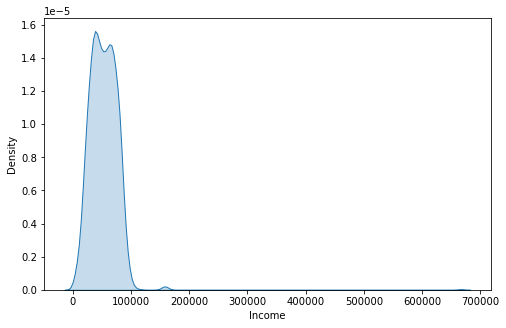

In [7]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Income'],fill=True)

In [8]:
df.describe()[['Income']].T[['mean','max','min']]

,mean,max,min
Income,52247.251354,666666.0,1730.0


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

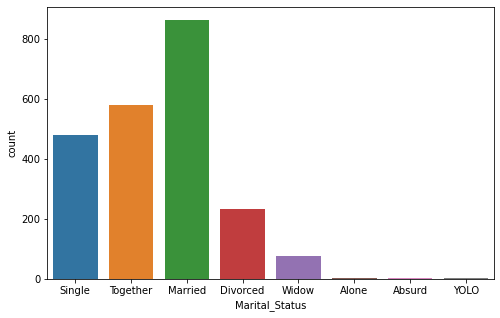

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

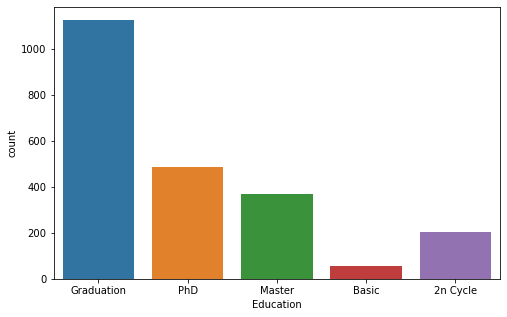

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

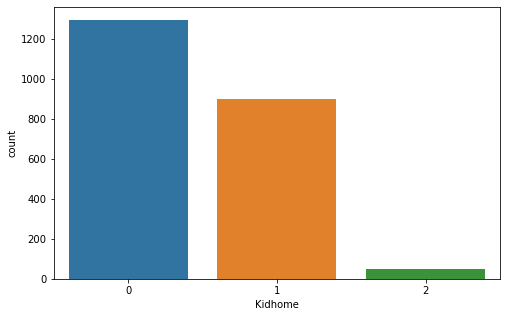

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(df['Kidhome'])

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

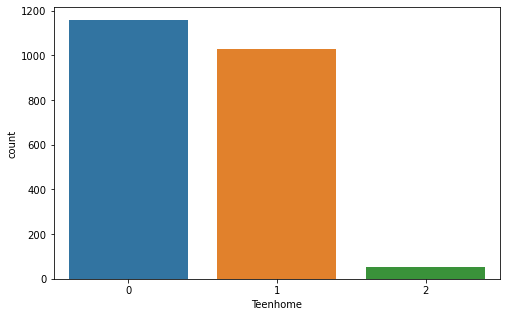

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df['Teenhome'])

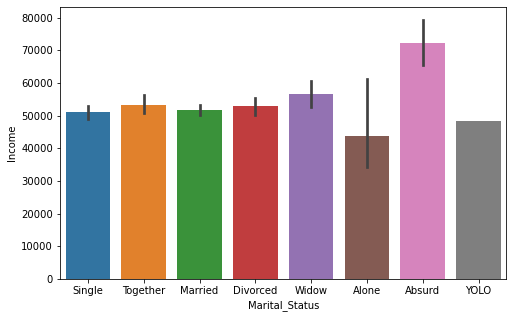

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Marital_Status', y='Income')
plt.show()


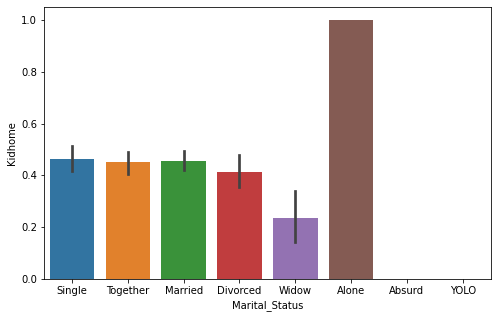

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Marital_Status', y='Kidhome')
plt.show()

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [16]:
df['Age']=2024-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


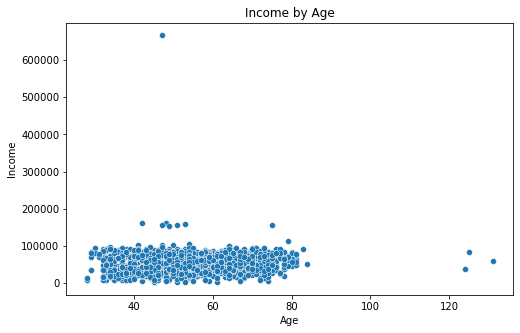

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Income by Age')
plt.show()

## Insights

1. Graduation form of the education is more from the dataset
2. Married people population is more from the dataset
3. Majority of the income lies between 0 to 100000
4. Absurd, widow, divorced earn more and stands in top 3
5. The mean household income is 52247

In [18]:
df_cleaned = df.dropna(subset=['Income'])
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43


In [19]:
df_cleaned.shape

(2216, 30)

In [20]:
df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [21]:
df_cleaned['Spent'] = df_cleaned['MntWines']+df_cleaned['MntFruits']+df_cleaned['MntMeatProducts']+df_cleaned['MntFishProducts']+df_cleaned['MntSweetProducts']
+df_cleaned['MntGoldProds']

0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: MntGoldProds, Length: 2216, dtype: int64

In [22]:
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,1529
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,21
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,734
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,48
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,407


In [23]:
df_cleaned['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
df_cleaned['Living'] = df_cleaned['Marital_Status'].replace({"Married":"Together",
                                                            "Together":"Together","Single":"Alone",
                                                           "Divorced":"Alone","Widow":"Alone",
                                                           "Alone":"Alone","Absurd":"Alone",
                                                           "YOLO":"Alone"})

In [25]:
df_cleaned['Children']=df_cleaned['Kidhome']+df_cleaned['Teenhome']

In [26]:
df_cleaned['Living'] = df_cleaned['Living'].replace({'Together':2,'Alone':1})

In [27]:
df_cleaned['Living'].value_counts()

2    1430
1     786
Name: Living, dtype: int64

In [28]:
df_cleaned['Family_Size'] = df_cleaned['Living'] + df_cleaned['Children']

In [29]:
df_cleaned['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [30]:
df_cleaned['Education_status'] = df_cleaned['Education'].replace({"Graduation":"Graduate",
                                                            "PhD":"PostGraduate","Master":"Graduate",
                                                           "2n Cycle":"Undergraduate","Basic":"Undergraduate"})

In [31]:

df_cleaned = df_cleaned.drop(["Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"], axis=1)

In [32]:
df_cleaned.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living,Children,Family_Size,Education_status
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,67,1529,1,0,1,Graduate
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,70,21,1,2,3,Graduate
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,59,734,2,0,2,Graduate
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,40,48,2,1,3,Graduate
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,43,407,2,1,3,PostGraduate


## Exploratory Data Analysis

### Univariate Analysis

Univariate analysis involves examining the distribution and characteristics of a single variable in a dataset, often through statistical summaries and visualizations like histograms or bar plots. By plotting the frequency of each feature, we can gain insights into the central tendency (like mean or median), dispersion (such as range and variance), and the presence of outliers or skewness in the data. This analysis helps identify patterns, anomalies, or typical values within each feature, which are crucial for understanding the overall data structure and informing further analysis or preprocessing steps.

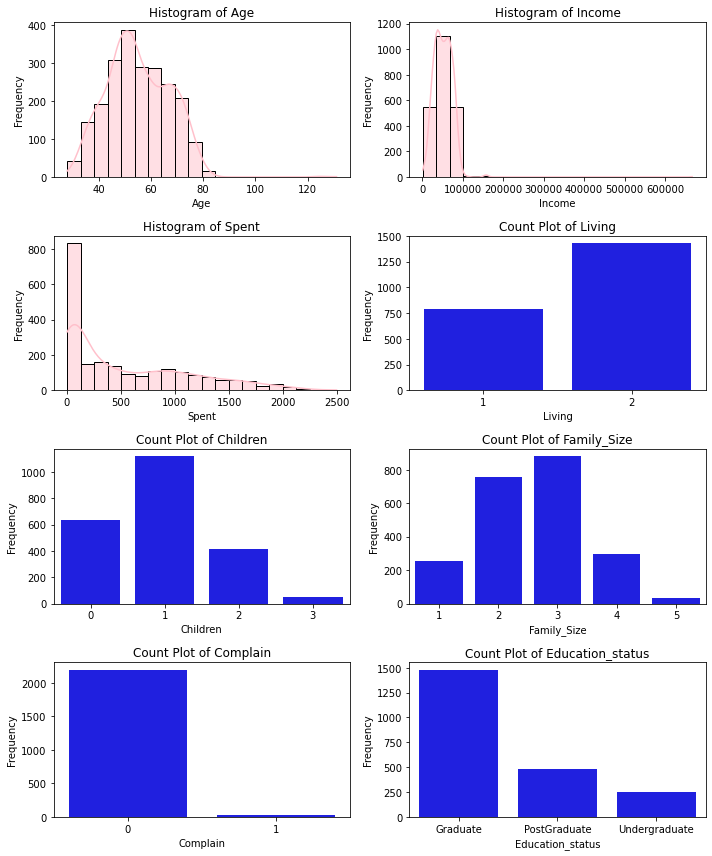

In [33]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living', 'Children', 'Family_Size', 'Complain', 'Education_status']
all_columns = continuous_columns + categorical_columns

# Calculate the number of rows needed for two columns
num_rows = (len(all_columns) + 1) // 2

# Setup the matplotlib figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array to make indexing easier

# Iterate over the columns and create appropriate plots
for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=df_cleaned, x=col, bins=20, ax=axes[i], kde=True, color='pink')  # Add density curve for continuous data
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=df_cleaned, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# If the number of columns is odd, hide the last subplot (if unused)
if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)  # Hide the last axis if not needed

# Adjust layout
plt.tight_layout()
plt.show()

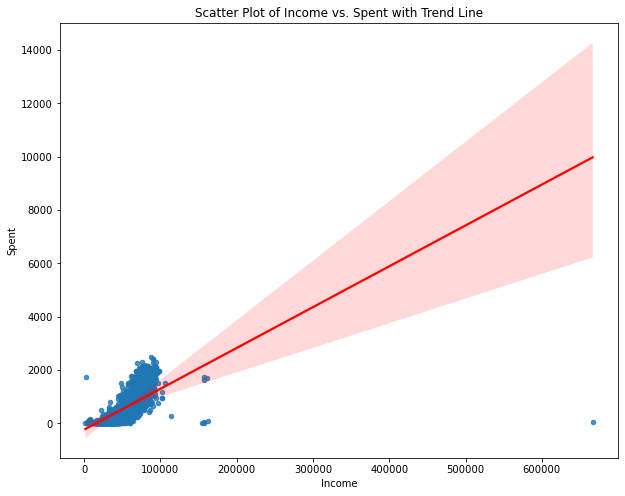

In [34]:
plt.figure(figsize=(10, 8))
sns.regplot(x='Income', y='Spent', data=df_cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})

plt.title('Scatter Plot of Income vs. Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


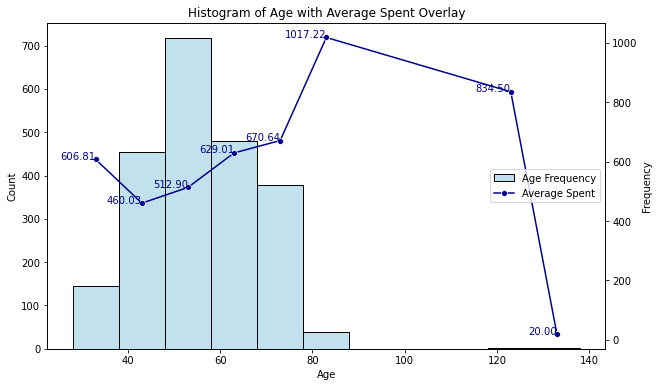

In [35]:
# Create bins for the 'Age' column
bins = np.arange(df_cleaned['Age'].min(), df_cleaned['Age'].max() + 10, 10)  # Adjust the bin width as necessary
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers

df_cleaned['Age_bins'] = pd.cut(df_cleaned['Age'], bins=bins, include_lowest=True)

# Group by the bins and calculate the mean of 'Spent'
grouped = df_cleaned.groupby(pd.cut(df_cleaned['Age'], bins=bins, labels=bin_centers))['Spent'].mean().reset_index()
grouped.columns = ['Age_bins', 'Spent']

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', bins=bins, color='lightblue', kde=False, stat='count', label='Age Frequency')

# Create a secondary y-axis for the line plot
ax2 = plt.twinx()
lineplot = sns.lineplot(data=grouped, x='Age_bins', y='Spent', ax=ax2, color='darkblue', marker='o', label='Average Spent')

# Setting labels and title
plt.title('Histogram of Age with Average Spent Overlay')
plt.xlabel('Age')
ax2.set_ylabel('Average Spent')
plt.ylabel('Frequency')

# Adding text labels at each point
for x, y in zip(grouped['Age_bins'], grouped['Spent']):
    ax2.text(x, y, f'{y:.2f}', color='darkblue', ha='right', size=10)

# Handling legends
handles, labels = [], []
for ax in plt.gcf().axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='center right')

plt.show()

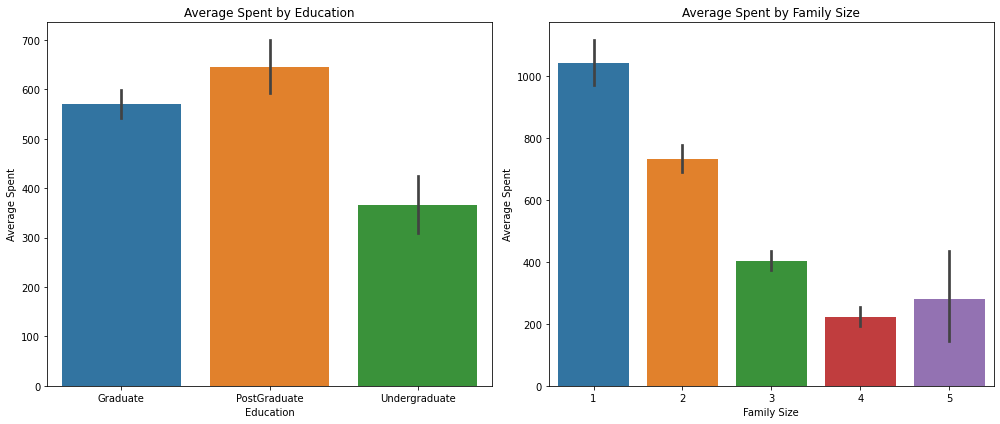

In [36]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot: Average "Spent" by "Education"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Education_status', y='Spent', data=df_cleaned)
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')

# Second subplot: Average "Spent" by "Children"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Family_Size', y='Spent', data=df_cleaned)
plt.title('Average Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spent')

# Adjust layout
plt.tight_layout()

plt.show()

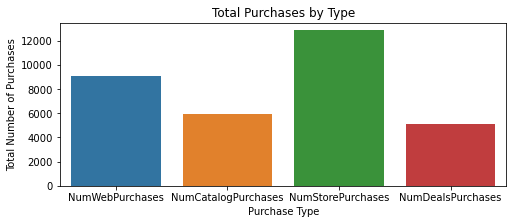

In [37]:
# Create a new dataframe that sums up each purchase type
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Total Purchases': [
        df_cleaned['NumWebPurchases'].sum(),
        df_cleaned['NumCatalogPurchases'].sum(),
        df_cleaned['NumStorePurchases'].sum(),
        df_cleaned['NumDealsPurchases'].sum()
    ]
}

df_totals = pd.DataFrame(totals)

# Create the bar chart
plt.figure(figsize=(8, 3))
sns.barplot(x='Purchase Type', y='Total Purchases', data=df_totals)
plt.title('Total Purchases by Type')

plt.ylabel('Total Number of Purchases')

plt.show()

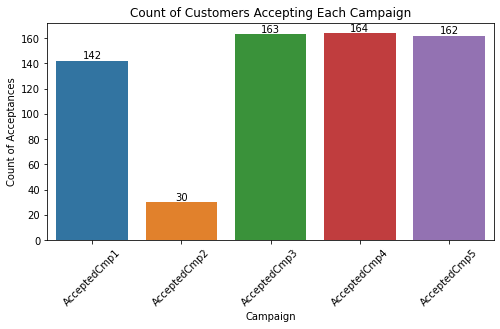

In [38]:
# Calculate the count of acceptances for each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
counts = df_cleaned[campaigns].sum().reset_index()
counts.columns = ['Campaign', 'Count of Acceptances']

# Create the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Campaign', y='Count of Acceptances', data=counts)

# Add annotations for the count of acceptance values on top of each bar
for index, row in counts.iterrows():
    plt.annotate(f'{row["Count of Acceptances"]}', 
                 xy=(index, row["Count of Acceptances"]), 
                 ha='center', va='bottom')

# Set the title and labels
plt.title('Count of Customers Accepting Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count of Acceptances')
plt.xticks(rotation=45)  
plt.show()

In [39]:
df_cleaned['Age_bins'].value_counts()

(48.0, 58.0]      678
(38.0, 48.0]      502
(58.0, 68.0]      485
(68.0, 78.0]      338
(27.999, 38.0]    187
(78.0, 88.0]       23
(118.0, 128.0]      2
(128.0, 138.0]      1
(88.0, 98.0]        0
(98.0, 108.0]       0
(108.0, 118.0]      0
Name: Age_bins, dtype: int64

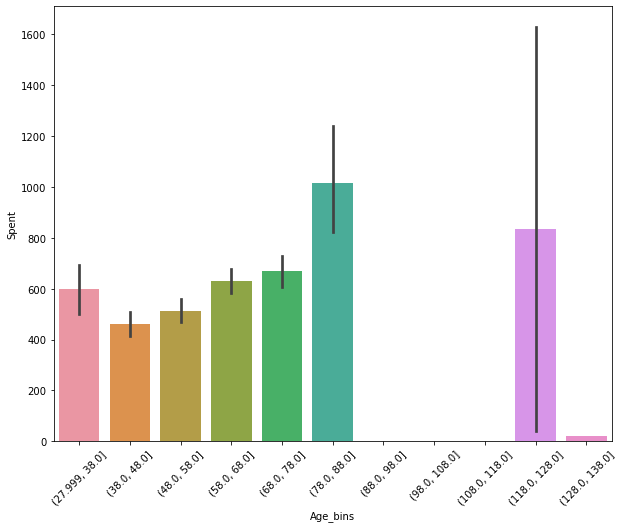

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_cleaned, x='Age_bins', y='Spent')
plt.xticks(rotation=45) 
plt.show()

In [41]:
df_cleaned.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,Spent,Living,Children,Family_Size,Education_status,Age_bins
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,1,67,1529,1,0,1,Graduate,"(58.0, 68.0]"
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,70,21,1,2,3,Graduate,"(68.0, 78.0]"
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,59,734,2,0,2,Graduate,"(58.0, 68.0]"
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,40,48,2,1,3,Graduate,"(38.0, 48.0]"
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,43,407,2,1,3,PostGraduate,"(38.0, 48.0]"


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [43]:
df_cleaned.drop(['Education'], axis=1, inplace=True)

In [44]:
df_cleaned.columns

Index(['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Living', 'Children', 'Family_Size', 'Education_status', 'Age_bins'],
      dtype='object')

In [45]:
#Get list of categorical variables
cat = (df_cleaned.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Marital_Status', 'Education_status']


In [46]:
df_cleaned['Education_status'] = df_cleaned['Education_status'].replace({"Graduate":'1',
                                                            "PostGraduate":'2',"Graduate":'1',
                                                           "Undergraduate":'0',"Undergraduate":'0'})

In [48]:
df_cleaned.drop(['Marital_Status'], axis=1, inplace=True)

In [49]:
df_cleaned.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Age,Spent,Living,Children,Family_Size,Education_status,Age_bins
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,67,1529,1,0,1,1,"(58.0, 68.0]"
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,70,21,1,2,3,1,"(68.0, 78.0]"
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,59,734,2,0,2,1,"(58.0, 68.0]"
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,40,48,2,1,3,1,"(38.0, 48.0]"
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,43,407,2,1,3,2,"(38.0, 48.0]"


In [51]:
df_cleaned['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

In [52]:
df_cleaned['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

In [53]:
#Creating a copy of data
ds = df_cleaned.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response', 'Age_bins']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

All features are now scaled


In [55]:
scaled_ds.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living,Children,Family_Size,Education_status
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,1.428553,2.504712,-0.554143,0.693232,0.986443,1.673832,-1.348829,-1.264803,-1.758673,-0.180750
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,-0.939446,-1.348829,1.405806,0.450009,-0.180750
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,1.428553,-0.229327,1.291982,-0.543978,0.318822,0.296142,0.741384,-1.264803,-0.654332,-0.180750
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,-0.892656,0.741384,0.070501,0.450009,-0.180750
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,0.333796,0.112428,0.061232,-0.131574,-1.016420,-0.270530,0.741384,0.070501,0.450009,1.583752


## Data Preprocessing

We have to perform feature engineering to prepare the data for machine learning. The step includes:

Label encoding the categorical features.

Scaling the features using the standard scaler.

Create a subset dataframe for dimensionality reduction using PCA.

## Dimensionality Reduction

## Dimensionality reduction is a critical preprocessing step before employing KMeans clustering for several reasons:

Improving Clustering Performance: KMeans clustering calculates distances between points to form clusters. In high-dimensional spaces, distance metrics can become less meaningful—a phenomenon known as the "curse of dimensionality." Reducing the number of dimensions helps mitigate this issue, making the distance metric more reliable and the clustering results more meaningful.

Enhanced Visualization: Visualization is a powerful tool for interpreting clustering results. However, visualizing high-dimensional data directly is not feasible. Reducing the data to two or three dimensions allows for effective visualization, enabling easier analysis and communication of the clustering outcomes.

Feature Selection and Noise Reduction: Dimensionality reduction techniques like Principal Component Analysis (PCA) not only reduce the data dimensions but also help in identifying the most significant variables. This can be viewed as a form of feature selection, where only the features that contribute most to the variance in the data are retained. By focusing on these key features, KMeans can produce more distinct and interpretable clusters.

## Dimensionality reduction with Principal Component Analysis (PCA)

PCA is a statistical technique used in data analysis to emphasize variation and bring out strong patterns in a dataset. PCA helps in identifying correlations and patterns in data that are not easily identified in raw data. The technique transforms the original variables into a new set of variables, which are called principal components. These principal components are orthogonal (meaning they are uncorrelated), and they are ordered so the first few retain most of the variation present in all of the original variables. PCA is widely used for dimensionality reduction in machine learning and data visualization.

The following PCA steps efficiently reduces the dimensionality of the data while attempting to retain the most significant variance present in the original dataset, which is often crucial for visualization, noise reduction, and speeding up further analysis.

The PCA object is initialized with n_components=2. This specifies that the PCA transformation will reduce the dimensionality of the dataset to 2 principal components.

In [62]:
#Initiating PCA to reduce dimentions to 2
pca = PCA(n_components=3)

# Fitting the PCA Model:
pca.fit(scaled_ds)

# Transforming the Data and Creating a DataFrame:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

# Descriptive statistics
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,4.248507e-17,2.764154,-5.711463,-2.441502,-0.748750,2.385965,7.209680
col2,2216.0,6.432881e-17,1.628154,-3.961852,-1.302243,-0.079589,1.159069,6.470509
col3,2216.0,9.739502e-17,1.183924,-3.663952,-0.789704,0.003068,0.822885,4.669989


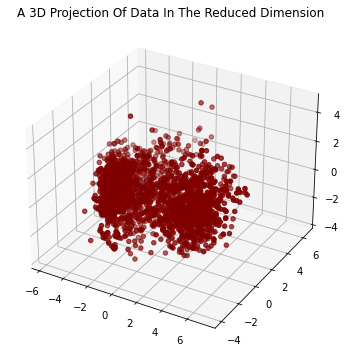

In [64]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering - Customer Segmentation

The steps involved in the Clustering are:

Elbow Method to determine the optimum number of clusters

Employ the KMeans (Clustering)

Examining the clusters

In [66]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


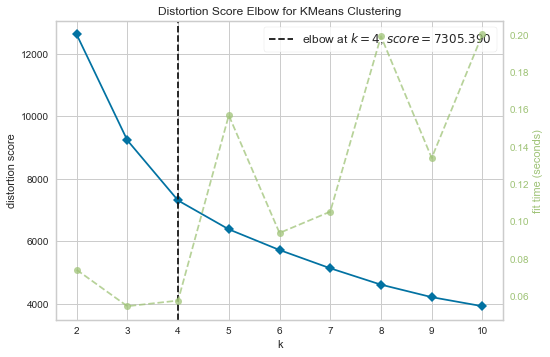

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [70]:
# Initiating the KMeans Clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit model and predict clusters
cluster_labels = kmeans.fit_predict(PCA_ds)  # Changed variable name from yhat_kmeans to cluster_labels
PCA_ds["Clusters"] = cluster_labels
# Adding the Clusters feature to the original dataframe.
df_cleaned["Clusters"] = cluster_labels
scaled_ds["Clusters"] = cluster_labels

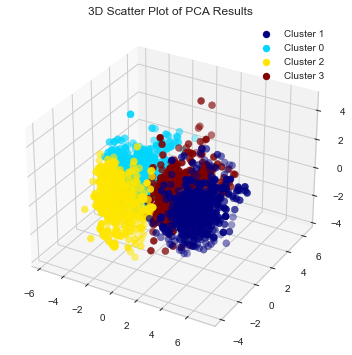

In [71]:
# Create a new figure for the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract columns for the plot
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

# Get unique clusters
clusters = PCA_ds['Clusters'].unique()

# Color map for clusters
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

# Plot each cluster
for cluster, color in zip(clusters, colors):
    ix = PCA_ds['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

## Evaluating the Model

As we are working with unsupervised clustering, we do not have labeled feature to directly evaluate or score our model. Instead, the focus is to examine the patterns within the formed clusters and understand their characteristics.

To achieve this, we can conduct exploratory data analysis to visualize the data across different clusters and derive insights, enabling us to draw meaningful conclusions about the underlying cluster patterns.

Note that we can evaluate the clusters associated with both the scaled and the original data, as they correspond to the same rows.

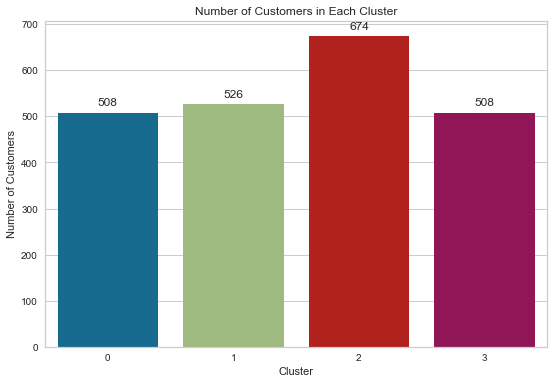

In [78]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Clusters', data=df_cleaned)

plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

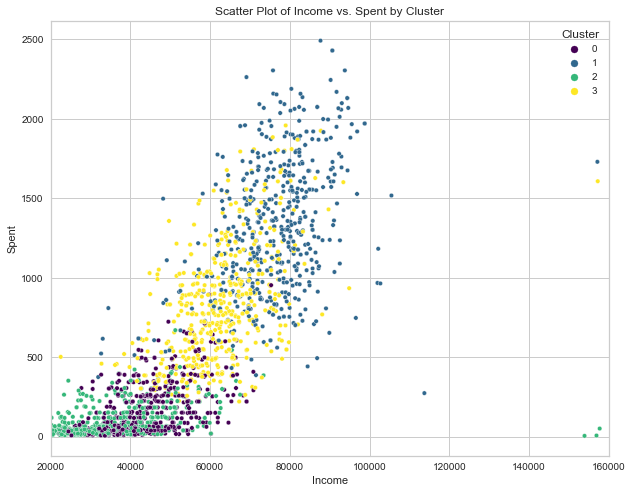

In [88]:

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Spent', hue='Clusters', data=df_cleaned, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')

plt.gca().xaxis.set_major_locator(MultipleLocator(20000))

# Set x-axis limit from 20,000 to 160,000
plt.xlim(20000, 160000)

plt.show()

We can notice that:

Clusters 0 and 2 have both low speding and low income.

Cluster 3 has average spending and average income.

Cluster 1 has high speding and high income.

In [91]:
from math import pi

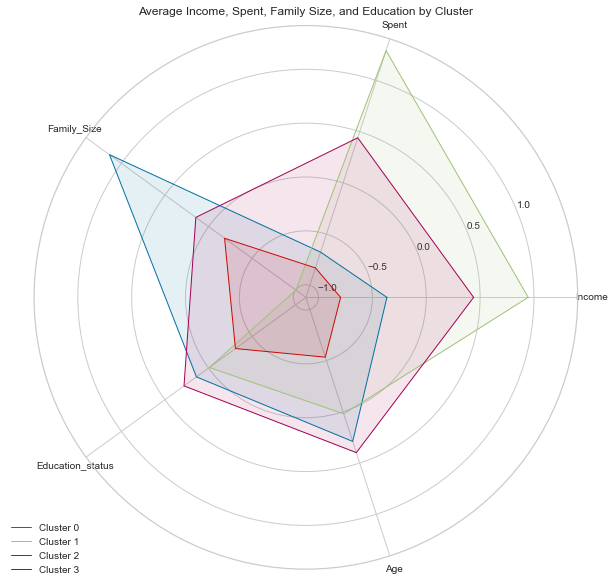

In [97]:

# Group by 'Clusters' and calculate the mean for 'Income', 'Spent', and 'Family_Size'
attributes = ['Income', 'Spent', 'Family_Size', 'Education_status', 'Age']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Average Income, Spent, Family Size, and Education by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

We can make the following observations:

Cluster 0: This cluster represents a middle group with low income and spending, and the largest family size. It contains  old demographic among all clusters.

Cluster 1: This group exhibits high income and high spending levels, yet it has the least family size. It compromises the older age group (40-50 years old).

Cluster 2: This group tells the lowest income and spending, less family size and compromises the youngest group

Cluster 3: Characterized by the medium income and spending of all groups, this cluster has an average family size and is primarily made up of the oldest customers.

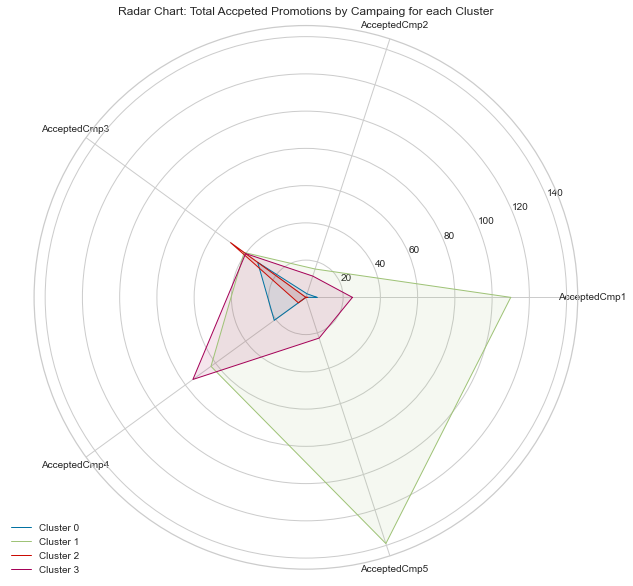

In [93]:
# Group by 'Clusters' and calculate the mean for ...
attributes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cluster_means = df_cleaned.groupby('Clusters')[attributes].sum().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Total Accpeted Promotions by Campaing for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

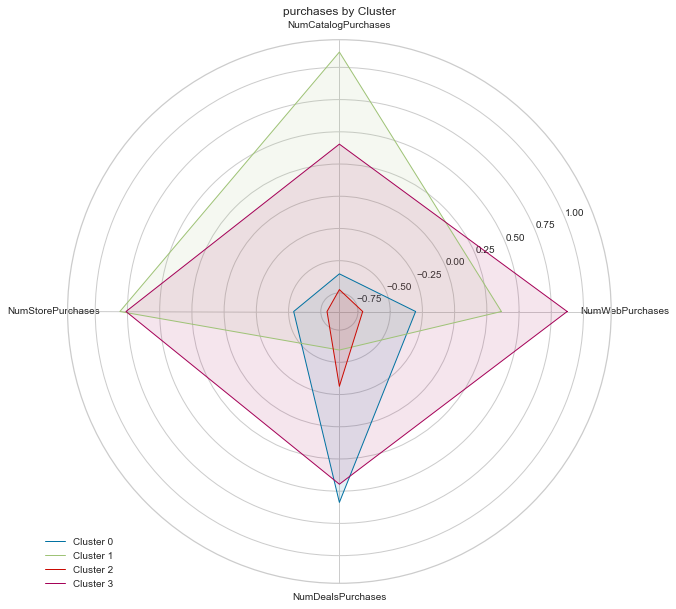

In [115]:
attributes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('purchases by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

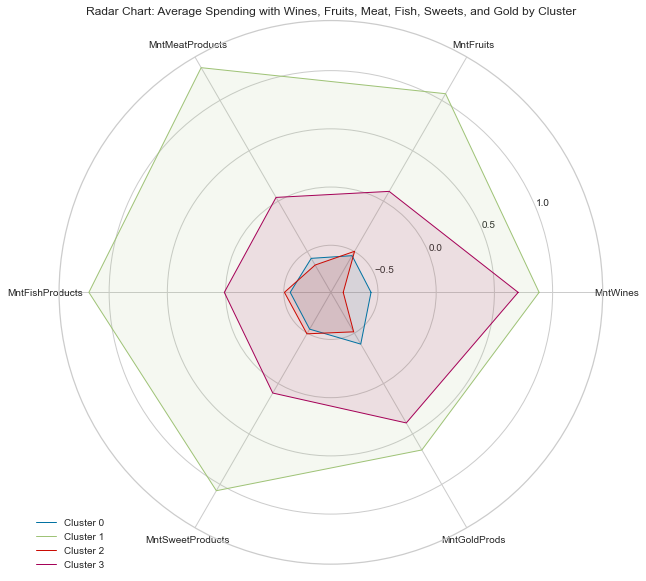

In [114]:
# Group by 'Clusters' and calculate the mean for ...
attributes = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Average Spending with Wines, Fruits, Meat, Fish, Sweets, and Gold by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

## Conclusion

In this project, we have meticulously analyzed a Customer Dataset through the creation of customer segmentation. Our workflow encompassed data cleaning, extensive feature engineering, outlier management, and exploratory data analysis enhanced by visualizations. We then proceeded with data preprocessing, which included label encoding for categorical features, scaling of all features, and dimensionality reduction via PCA.

During the Machine Learning phase, we utilized the Elbow method to determine the optimal number of clusters (K) for the KMeans algorithm. After fitting the model, we conducted a thorough analysis of the resulting customer segments to extract distinct profiles for each cluster, revealing insightful patterns in consumer behavior.

### Insights on Cluster Profiles:

#### Cluster 0:


Exhibits high to low income and spending.

Typically consists of the largest family size.

Represents the oldest age demographic.

Shows comparatively more expenditure on gold.

Purchases primarily through deals.

Exhibits the lowest campaign acceptance, Predominantly responds to campaign 3.

#### Cluster 1:

Features the highest income and spending.

Contains the least family size(singles).

Generally mid in age.

Shows comparatively more expenditure on fish but tops the table in all expenditures.

Favors purchases from catalogs.

Shows campaign 1,5 being the most accepted.

#### Cluster 2:

Features the least income and spending.

Primarily consists of singles.

Generally in young age.

Spents equally on fruits, fish, sweets.

Favors purchases from deals.

Shows a high acceptance rate for campaign 4.

#### Cluster 3:

Noted for the medium income and spending.

Comprises mid size families.

Includes the oldest demographic.

Spends more on wine.

Hihgly educated people.

Frequently purchases through all deals.

With campaign 4 being notably accepted.

#### Future Recommendations
To enhance the robustness and applicability of our findings, future work could explore the integration of additional predictive modeling techniques and the application of advanced algorithms for dynamic segmentation. Employing time series analysis to track changes in customer behavior over time could provide deeper insights into trends and lifecycle patterns. Additionally, conducting A/B testing on selected campaigns within identified segments may offer concrete data on the effectiveness of targeted marketing strategies, thereby maximizing customer engagement and optimizing marketing spend.

This thoughtful approach not only underscores the detailed analysis undertaken but also highlights potential avenues for enriching the insights gleaned from customer data.